In [2]:
import numpy as np
import healpy as hp
import pickle
from matplotlib.pyplot import *
# from cmblensplus/wrap/
import curvedsky as cs
# from cmblensplus/utils/
import cmb as CMB
import plottools as pl
import maptools
import constant as c
# others
import local
import tools_multitracer as mass
import tools_delens
import tools_cmb
import warnings
warnings.filterwarnings("ignore")

In [3]:
# define parameters
lbmax  = 4*64     # maximum multipole of alm to be generated
lmax = 2*512
L = np.linspace(0,lbmax,lbmax+1)

In [4]:
params = local.analysis()

In [5]:
mask = tools_cmb.prepare_masks(nside=64)

In [6]:
fsky1 = np.average(mask['lbs4'])
fsky2 = np.average(mask['lbonly'])
print(fsky1,fsky2)

0.21331787109375 0.2531331380208333


In [7]:
cobj = tools_cmb.cmb_map()
dobj = tools_delens.filename()

In [8]:
rlz = 3
m = 'lbonly'

In [ ]:
# make LT
#wElm = pickle.load(open(cobj.fwalm[m][rlz],"rb"))[0]
#klm = {}
#klm[0], klm[1], klm[2], klm[3] = pickle.load(open(local.data_directory()['mas'] + 'alm/coadd_mass_'+str(rlz)+'.pkl',"rb"))
#blm = { i: cs.delens.lensingb( lmax, 2, lmax, 2, lmax, wElm, klm[i], gtype='k') for i in range(4) }

In [ ]:
# read Wiener-filtered polarization
#blm = pickle.load(open(dobj.fLTlm[m][rlz],"rb"))

In [ ]:
# compute observed B-mode
#Qn = hp.read_map(params.ffgs[rlz],field=1)/c.Tcmb
#Un = hp.read_map(params.ffgs[rlz],field=2)/c.Tcmb
#NSIDE = hp.get_nside(Qn)
#Qs = hp.read_map(params.ficmb[rlz],field=1)/c.Tcmb
#Us = hp.read_map(params.ficmb[rlz],field=2)/c.Tcmb
#sBlm = cs.utils.hp_map2alm_spin(hp.get_nside(Qs),lbmax,lbmax,2,Qs,Us)[1]
#nBlm  = cs.utils.hp_map2alm_spin(NSIDE,lbmax,lbmax,2,Qn,Un)[1]
#sBmap = cs.utils.hp_alm2map(NSIDE,lbmax,lbmax,sBlm)
#nBmap = cs.utils.hp_alm2map(NSIDE,lbmax,lbmax,nBlm)
#oBmap = sBmap + nBmap
#oBlm, nBlm = {}, {}
#oBlm[m] = cs.utils.hp_map2alm(NSIDE,lbmax,lbmax,mask[m]*oBmap)
#nBlm[m] = cs.utils.hp_map2alm(NSIDE,lbmax,lbmax,mask[m]*nBmap)

In [ ]:
#loglog(cs.utils.alm2cl(lbmax,blm[3][:lbmax+1,:lbmax+1],oBlm[m]))

In [ ]:
#MoBmap = cs.utils.hp_alm2map(NSIDE,lbmax,lbmax,oBlm[m])
#dmap = cs.utils.hp_alm2map(NSIDE,lbmax,lbmax,blm[1][:lbmax+1,:lbmax+1])
#wEmap = cs.utils.hp_alm2map(NSIDE,lbmax,lbmax,wElm[:lbmax+1,:lbmax+1])
#hp.mollview(MoBmap)
#hp.mollview(dmap)
#hp.mollview(wEmap)

In [14]:
dobj = tools_delens.filename()

In [18]:
cl_klb = np.loadtxt(dobj.cl['lbs4'][1][rlz],unpack=True)

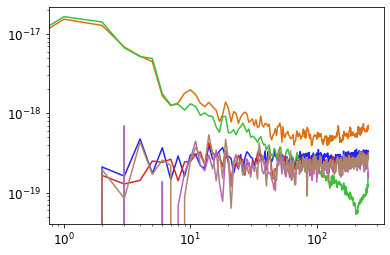

In [19]:
loglog(L,cl_klb[0])
for i in range(1,6):
    loglog(L,cl_klb[i]/fsky1)
#loglog(L,cl_klb[6])
#legend()

No handles with labels found to put in legend.


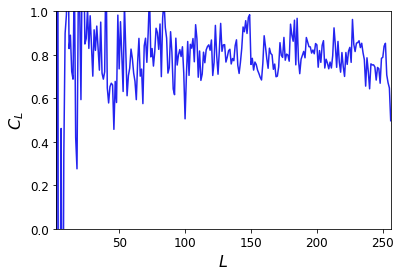

In [20]:
pl.plot_1dstyle(xmin=2,xmax=4*64,ymin=0,ymax=1)
plot(L,cl_klb[4]/fsky1/np.sqrt(cl_klb[3]/fsky1*cl_klb[0]))
legend()
show()